# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [2]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.info()
data.head(5)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)
stress_level = data.loc[:,'Stress Level']
quality_of_sleep = data.loc[:,'Quality of Sleep']

Missing values in each column:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


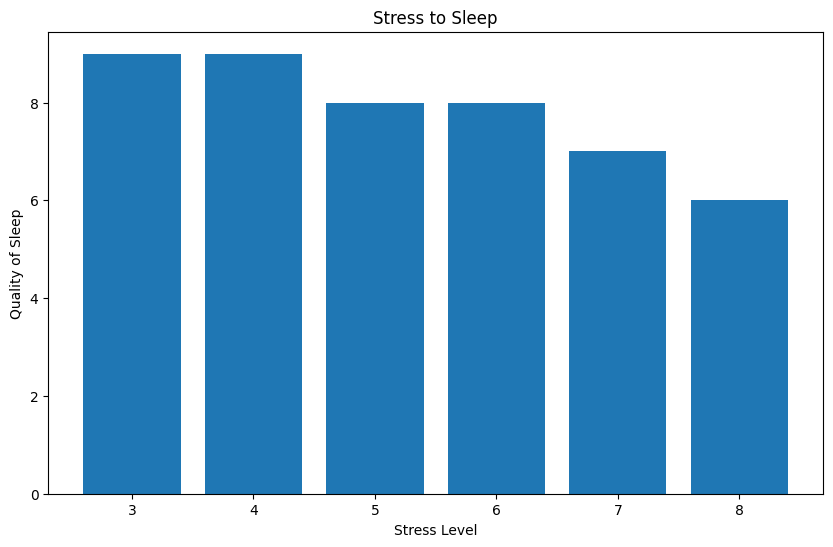

In [5]:
# 1. 막대그래프
plt.figure(figsize=(10,6))
plt.bar(stress_level, quality_of_sleep)
plt.title('Stress to Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

<Axes: xlabel='Age', ylabel='Quality of Sleep'>

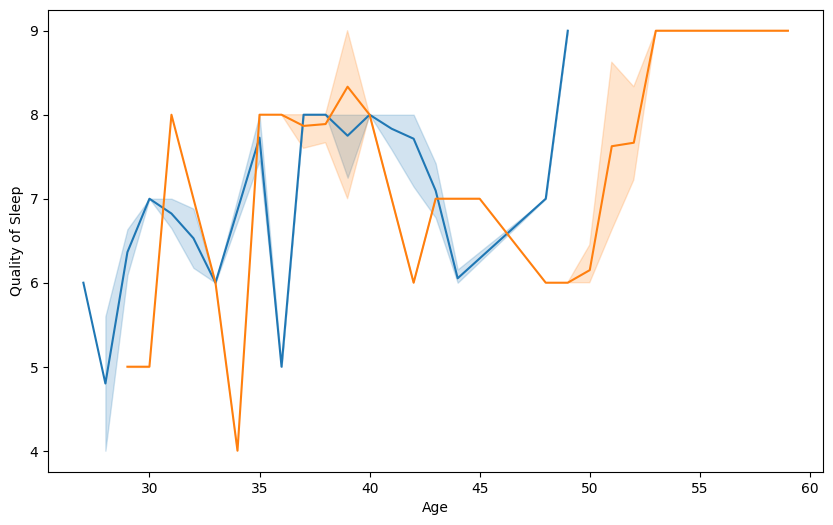

In [18]:
# 2. 선그래프
male_data = data[data['Gender']=='Male']
female_data = data[data['Gender']=='Female']
male_data['Blood Pressure']
plt.figure(figsize=(10,6))
sns.lineplot(x=male_data['Age'], y=male_data['Quality of Sleep'])
sns.lineplot(x=female_data['Age'], y=female_data['Quality of Sleep'])

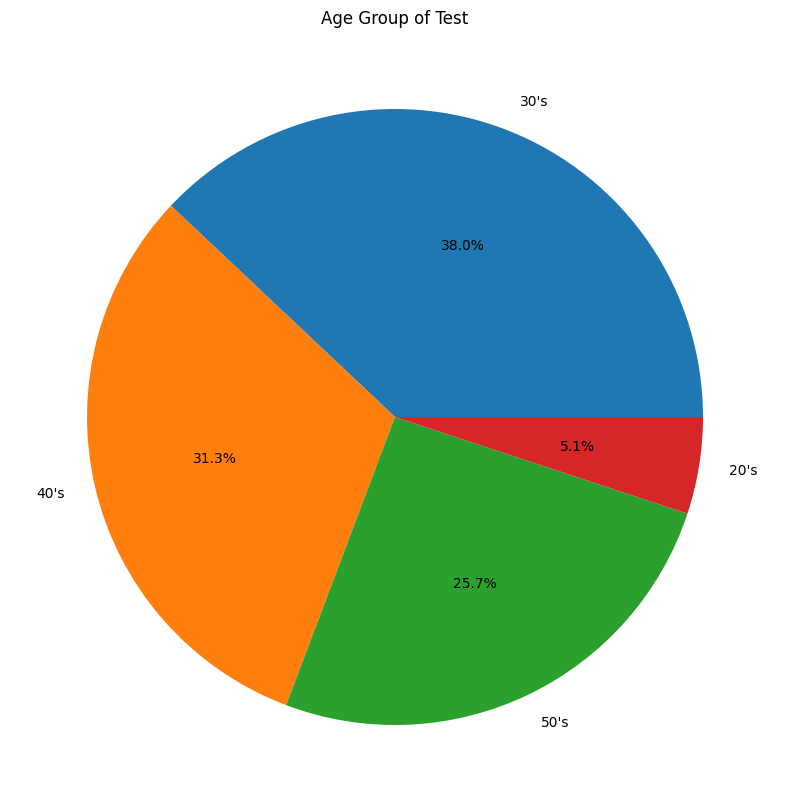

In [36]:
# 4. 파이차트
def age_group(age):
  if 10 <= age < 20:
    return '10\'s'
  elif 20<= age < 30:
    return '20\'s'
  elif 30<= age < 40:
    return '30\'s'
  elif 40<= age < 50:
    return '40\'s'
  elif 50<= age < 60:
    return '50\'s'
  else:
    return 'Over 60\'s'

data['Age Group'] = data['Age'].apply(age_group)
age_grade = data['Age Group'].value_counts().reset_index()

plt.figure(figsize=(10,10))
plt.pie(x=age_grade['count'], labels=age_grade['Age Group'], autopct='%1.1f%%')

plt.title("Age Group of Test")
plt.show()

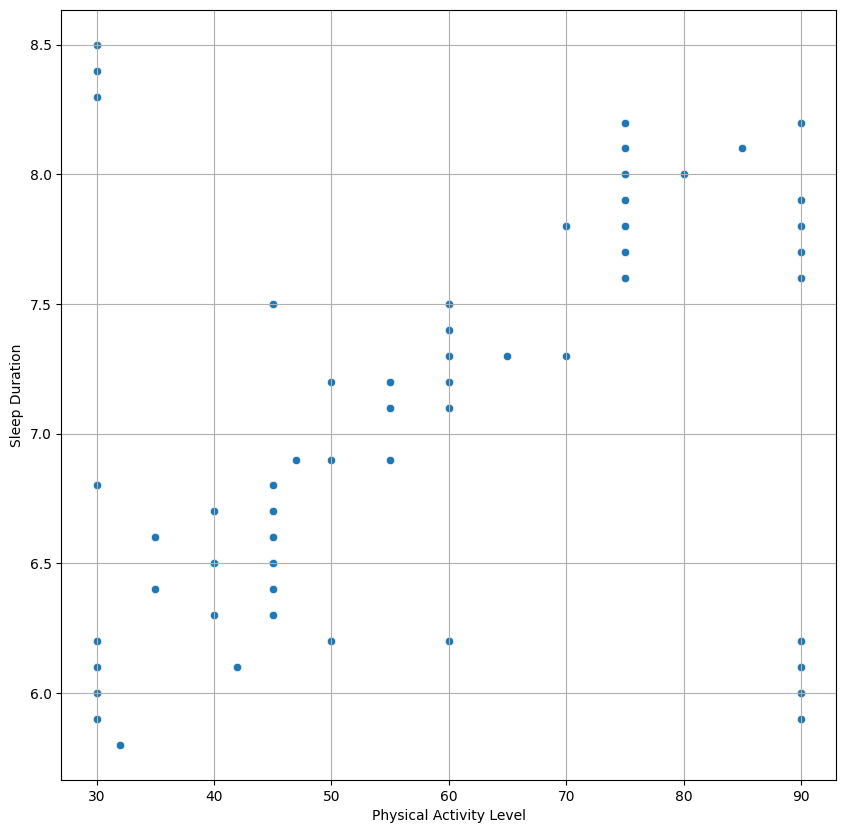

In [42]:
# 5. 산점도
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Physical Activity Level'], y=data['Sleep Duration'])
plt.grid(True)
plt.show()

<Axes: xlabel='Gender', ylabel='Sleep Duration'>

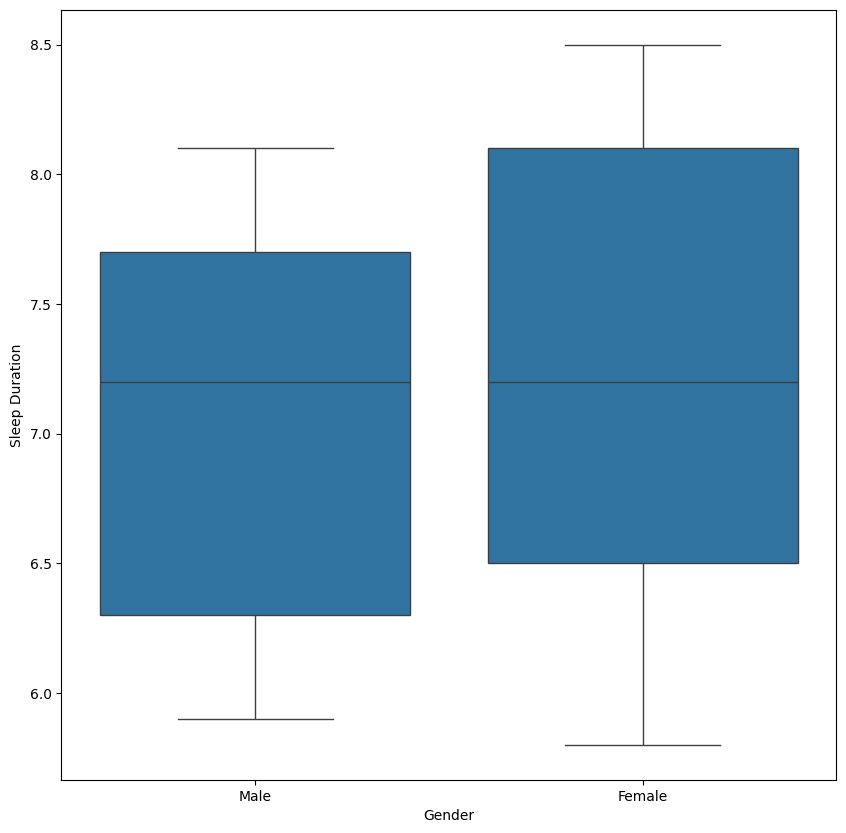

In [46]:
# 6. 박스플롯
plt.figure(figsize=(10,10))
sns.boxplot(x=data['Gender'],y=data['Sleep Duration'],data=pd.DataFrame(data))

In [ ]:
# 7. 여러 시각화 차트 합쳐보기